<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

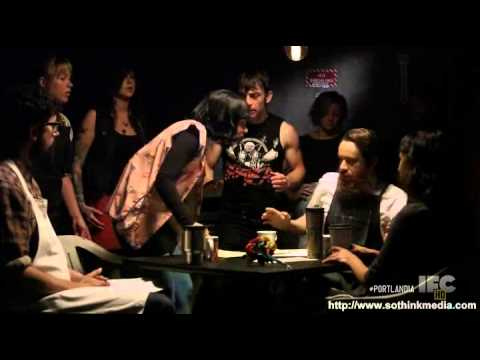

In [60]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [61]:
%pwd

'/home/primefactorx01/lambda/unit-03/sprint-01/module1-text-data'

In [62]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"


shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [63]:
# Start here 

In [64]:
shops['star_rating_numeric'] = shops['star_rating'].str.extract('(\d*\.\d*)')
shops['star_rating_numeric'] = pd.to_numeric(shops['star_rating_numeric'])
shops['star_rating_numeric'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating_numeric, dtype: int64

In [65]:
shops['date'] = shops['full_review_text'].str.extract('(\d{1,2}\/\d{1,2}\/\d*)')
shops['date'] = pd.to_datetime(shops['date'])

In [66]:
import re

In [67]:
pattern = re.compile("(\d{1,2}\/\d{1,2}\/\d*) ")
shops['cleaned_review_text'] = shops['full_review_text'].str.replace(pattern, "")

0        1 check-in Love love loved the atmosphere! Ev...
1        Listed in Date Night: Austin, Ambiance in Aus...
2        1 check-in Listed in Brunch Spots I loved the...
3        Very cool decor! Good drinks Nice seating  Ho...
4        1 check-in They are located within the Northc...
                              ...                        
7611     I actually step into this restaurant by chanc...
7612     Ok, The Steeping Room IS awesome. How do they...
7613     Loved coming here for tea, and the atmosphere...
7614     The food is just average. The booths didn't f...
7615     I finally stopped in for lunch with my collea...
Name: full_review_text, Length: 7616, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [93]:
shops['great'] = [x >= 4 for x in shops['star_rating_numeric']]

In [68]:
import spacy
from spacy.tokenizer import Tokenizer

In [69]:

nlp = spacy.load("en_core_web_lg")

In [70]:
tokenizer = Tokenizer(nlp.vocab)

In [71]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [89]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

def count_words(df, n = 10):
    tokens = []
    df = df.copy()

    """ Update those tokens w/o stopwords"""
    for doc in tokenizer.pipe(df['cleaned_review_text']):
        
        doc_tokens = []

        STOP_WORDS = nlp.Defaults.stop_words.union({' ', 'coffee', 'place', '1', 'check-in', "i'm", "it's", "i've", "austin"})
        
        for token in doc:
            if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens


    wc = count(df['tokens'])

    wc_top = wc[wc['rank'] <= n]

    squarify.plot(sizes=wc_top['pct_total'], label=wc_top['word'], alpha=.8 )
    plt.axis('off')
    plt.show()
    return wc_top

## Top 10 word counds for all reviews

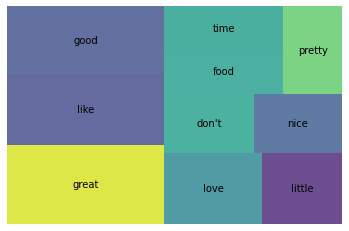

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
146,great,2438,3250,1.0,0.008840,0.008840,0.320116
176,like,2034,2902,2.0,0.007893,0.016733,0.267069
168,good,2084,2779,3.0,0.007559,0.024292,0.273634
11,love,1434,1806,4.0,0.004912,0.029204,0.188288
784,little,1230,1479,5.0,0.004023,0.033227,0.161502
342,don't,1133,1395,6.0,0.003794,0.037021,0.148766
185,nice,1188,1368,7.0,0.003721,0.040742,0.155987
478,food,1092,1363,8.0,0.003707,0.044449,0.143382
619,time,1099,1345,9.0,0.003658,0.048108,0.144301
22,pretty,1066,1339,10.0,0.003642,0.051750,0.139968


In [90]:
count_words(shops, 10)

### Top 10 words by score
#### 5 star

In [ ]:
from IPython.display import display, HTML

Score: 1


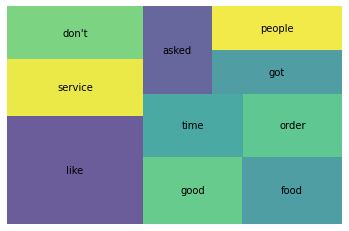

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
145,like,100,163,1.0,0.010397,0.010397,0.359712
1,service,68,86,2.0,0.005486,0.015883,0.244604
50,don't,68,80,3.0,0.005103,0.020986,0.244604
33,good,63,75,4.0,0.004784,0.025770,0.226619
118,food,50,75,5.0,0.004784,0.030554,0.179856
352,time,49,70,6.0,0.004465,0.035019,0.176259
96,order,45,69,7.0,0.004401,0.039421,0.161871
394,asked,53,68,8.0,0.004338,0.043758,0.190647
364,got,56,65,9.0,0.004146,0.047905,0.201439
278,people,46,63,10.0,0.004019,0.051923,0.165468




Score: 2


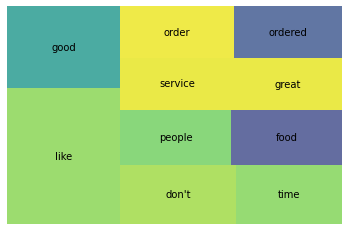

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,like,178,279,1.0,0.010697,0.010697,0.386957
15,good,134,169,2.0,0.006479,0.017176,0.291304
219,don't,103,125,3.0,0.004792,0.021968,0.223913
340,time,85,114,4.0,0.004371,0.026339,0.184783
179,people,88,113,5.0,0.004332,0.030671,0.191304
589,food,69,112,6.0,0.004294,0.034965,0.150000
1,service,83,108,7.0,0.004141,0.039106,0.180435
178,order,71,107,8.0,0.004102,0.043208,0.154348
100,great,83,102,9.0,0.003911,0.047119,0.180435
312,ordered,76,102,10.0,0.003911,0.051029,0.165217




Score: 3


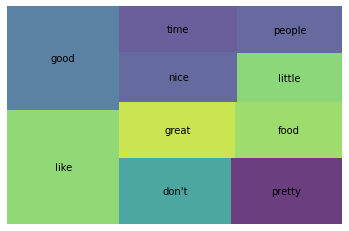

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
139,like,270,392,1.0,0.009747,0.009747,0.365854
65,good,244,355,2.0,0.008827,0.018574,0.330623
180,don't,169,225,3.0,0.005595,0.024169,0.228997
26,pretty,166,224,4.0,0.005570,0.029739,0.224932
148,great,147,198,5.0,0.004923,0.034662,0.199187
155,food,147,182,6.0,0.004525,0.039187,0.199187
412,nice,150,181,7.0,0.004501,0.043688,0.203252
223,time,130,167,8.0,0.004152,0.047840,0.176152
256,little,127,157,9.0,0.003904,0.051744,0.172087
396,people,113,151,10.0,0.003755,0.055499,0.153117




Score: 4


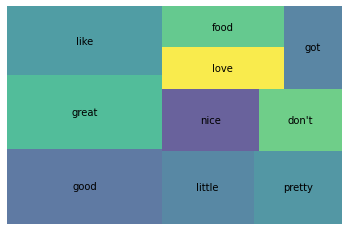

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
250,good,765,1056,1.0,0.008570,0.008570,0.324153
109,great,783,1037,2.0,0.008416,0.016985,0.331780
198,like,689,966,3.0,0.007839,0.024825,0.291949
727,little,489,606,4.0,0.004918,0.029743,0.207203
14,pretty,447,585,5.0,0.004747,0.034490,0.189407
214,nice,478,551,6.0,0.004472,0.038962,0.202542
283,don't,368,467,7.0,0.003790,0.042751,0.155932
6,love,371,459,8.0,0.003725,0.046476,0.157203
441,food,377,456,9.0,0.003701,0.050177,0.159746
188,got,343,436,10.0,0.003538,0.053715,0.145339




Score: 5


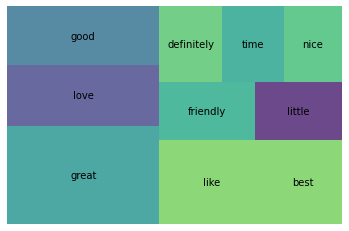

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
375,great,1391,1865,1.0,0.011480,0.011480,0.367989
11,love,892,1145,2.0,0.007048,0.018528,0.235979
83,good,878,1124,3.0,0.006919,0.025447,0.232275
163,like,797,1102,4.0,0.006783,0.032231,0.210847
48,best,713,817,5.0,0.005029,0.037260,0.188624
377,friendly,666,684,6.0,0.004210,0.041470,0.176190
227,little,538,624,7.0,0.003841,0.045311,0.142328
134,definitely,522,593,8.0,0.003650,0.048962,0.138095
204,time,504,588,9.0,0.003619,0.052581,0.133333
217,nice,484,550,10.0,0.003386,0.055967,0.128042


In [97]:
for i in range(1,6):
    print("Score: " + str(i))
    wc = count_words(shops[shops['star_rating_numeric'] == i].copy())
    display(wc)
    print("\n==============================\n")

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


great: True


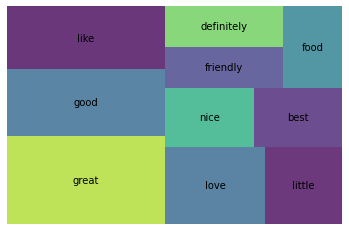

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
146,great,2174,2902,1.0,0.010158,0.010158,0.354072
281,good,1643,2180,2.0,0.007631,0.017789,0.267590
231,like,1486,2068,3.0,0.007239,0.025028,0.242020
11,love,1263,1604,4.0,0.005615,0.030643,0.205700
597,little,1027,1230,5.0,0.004306,0.034948,0.167264
245,nice,962,1101,6.0,0.003854,0.038802,0.156678
354,best,951,1093,7.0,0.003826,0.042628,0.154886
195,friendly,986,1014,8.0,0.003549,0.046178,0.160586
57,definitely,889,1002,9.0,0.003507,0.049685,0.144788
453,food,826,994,10.0,0.003479,0.053165,0.134528




great: False


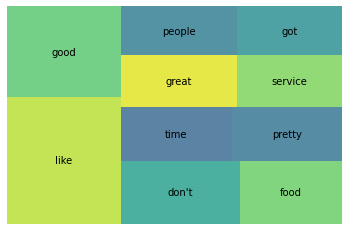

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,like,548,834,1.0,0.010174,0.010174,0.371274
15,good,441,599,2.0,0.007307,0.017481,0.298780
208,don't,340,430,3.0,0.005245,0.022726,0.230352
183,food,266,369,4.0,0.004501,0.027227,0.180217
250,time,264,351,5.0,0.004282,0.031509,0.178862
63,pretty,278,349,6.0,0.004257,0.035766,0.188347
176,great,264,348,7.0,0.004245,0.040011,0.178862
526,people,247,327,8.0,0.003989,0.044000,0.167344
1,service,261,314,9.0,0.003830,0.047830,0.176829
16,got,237,300,10.0,0.003660,0.051490,0.160569


In [98]:
for i in [True, False]:
    print("great: " + str(i))
    wc = count_words(shops[shops['great'] == i].copy())
    display(wc)
    print("\n==============================\n")

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

